In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

house_data = pd.read_csv("train.csv")
house_data_test = pd.read_csv("test.csv")



In [2]:
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
for col in house_data.columns:
    pct_missing = np.mean(house_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Id - 0%
MSSubClass - 0%
MSZoning - 0%
LotFrontage - 18%
LotArea - 0%
Street - 0%
Alley - 94%
LotShape - 0%
LandContour - 0%
Utilities - 0%
LotConfig - 0%
LandSlope - 0%
Neighborhood - 0%
Condition1 - 0%
Condition2 - 0%
BldgType - 0%
HouseStyle - 0%
OverallQual - 0%
OverallCond - 0%
YearBuilt - 0%
YearRemodAdd - 0%
RoofStyle - 0%
RoofMatl - 0%
Exterior1st - 0%
Exterior2nd - 0%
MasVnrType - 1%
MasVnrArea - 1%
ExterQual - 0%
ExterCond - 0%
Foundation - 0%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinSF1 - 0%
BsmtFinType2 - 3%
BsmtFinSF2 - 0%
BsmtUnfSF - 0%
TotalBsmtSF - 0%
Heating - 0%
HeatingQC - 0%
CentralAir - 0%
Electrical - 0%
1stFlrSF - 0%
2ndFlrSF - 0%
LowQualFinSF - 0%
GrLivArea - 0%
BsmtFullBath - 0%
BsmtHalfBath - 0%
FullBath - 0%
HalfBath - 0%
BedroomAbvGr - 0%
KitchenAbvGr - 0%
KitchenQual - 0%
TotRmsAbvGrd - 0%
Functional - 0%
Fireplaces - 0%
FireplaceQu - 47%
GarageType - 6%
GarageYrBlt - 6%
GarageFinish - 6%
GarageCars - 0%
GarageArea - 0%
GarageQu

In [5]:
#house_data = house_data.dropna(subset=['Alley', 'LotFrontage', 'MasVnrType','MasVnrArea', 'BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature' ])
#house_data

In [6]:
#https://www.folkstalk.com/2022/10/pandas-get-numeric-columns-with-code-examples.html
house_data = house_data._get_numeric_data()
house_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [7]:
house_features = ['YrSold', 'YearBuilt','YearRemodAdd','MSSubClass','LotArea','OverallCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold']
house_features


['YrSold',
 'YearBuilt',
 'YearRemodAdd',
 'MSSubClass',
 'LotArea',
 'OverallCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [8]:
for col in house_features:
    pct_missing = np.mean(house_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

YrSold - 0%
YearBuilt - 0%
YearRemodAdd - 0%
MSSubClass - 0%
LotArea - 0%
OverallCond - 0%
WoodDeckSF - 0%
OpenPorchSF - 0%
EnclosedPorch - 0%
3SsnPorch - 0%
ScreenPorch - 0%
PoolArea - 0%
MiscVal - 0%
MoSold - 0%


In [9]:
X = house_data[house_features]
y = house_data.SalePrice
print(X)
print(y)

      YrSold  YearBuilt  YearRemodAdd  MSSubClass  LotArea  OverallCond  \
0       2008       2003          2003          60     8450            5   
1       2007       1976          1976          20     9600            8   
2       2008       2001          2002          60    11250            5   
3       2006       1915          1970          70     9550            5   
4       2008       2000          2000          60    14260            5   
...      ...        ...           ...         ...      ...          ...   
1455    2007       1999          2000          60     7917            5   
1456    2010       1978          1988          20    13175            6   
1457    2010       1941          2006          70     9042            9   
1458    2010       1950          1996          20     9717            6   
1459    2008       1965          1965          20     9937            6   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           

In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [11]:
house_model = DecisionTreeRegressor(random_state = 0)

In [12]:
house_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [13]:
val_predictions = house_model.predict(val_X)

In [14]:
mae = mean_absolute_error(val_y, val_predictions)
mae

43744.449315068494

In [15]:
newmodel = DecisionTreeRegressor()

In [16]:
newmodel.fit(X,y)

DecisionTreeRegressor()

In [17]:
X_test = house_data_test[house_features]
X_test

,YrSold,YearBuilt,YearRemodAdd,MSSubClass,LotArea,OverallCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,2010,1961,1961,20,11622,6,140,0,0,0,120,0,0,6
1,2010,1958,1958,20,14267,6,393,36,0,0,0,0,12500,6
2,2010,1997,1998,60,13830,5,212,34,0,0,0,0,0,3
3,2010,1998,1998,60,9978,6,360,36,0,0,0,0,0,6
4,2010,1992,1992,120,5005,5,0,82,0,0,144,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2006,1970,1970,160,1936,7,0,0,0,0,0,0,0,6
1455,2006,1970,1970,160,1894,5,0,24,0,0,0,0,0,4
1456,2006,1960,1996,20,20000,7,474,0,0,0,0,0,0,9
1457,2006,1992,1992,85,10441,5,80,32,0,0,0,0,700,7


In [18]:
test_preds = newmodel.predict(X_test)
test_preds

array([142000., 150000., 267000., ..., 164900., 324000., 228000.])

In [19]:
#output = pd.DataFrame({'Id': X_test.index, "SalePrice":test_preds })

#output.to_csv('kagglecomp3sub.csv', index=False)

In [20]:
#output

In [21]:
#sample_submission = pd.read_csv('kagglecomp1sub.csv')

#output = pd.DataFrame({'Id': sample_submission.Id,
#'SalePrice': test_preds})
#output.to_csv('submission4.csv', index=False)

In [22]:
house_model2 = RandomForestRegressor(random_state=1)
house_model2.fit(train_X, train_y)
val_predictions2 = house_model2.predict(val_X)


In [23]:
mae2 = mean_absolute_error(val_y, val_predictions2)
mae2

33234.31291115459

In [24]:
newmodel2 = RandomForestRegressor()
newmodel2.fit(X,y)

RandomForestRegressor()

In [25]:
X_test2 = house_data_test[house_features]
X_test2

,YrSold,YearBuilt,YearRemodAdd,MSSubClass,LotArea,OverallCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,2010,1961,1961,20,11622,6,140,0,0,0,120,0,0,6
1,2010,1958,1958,20,14267,6,393,36,0,0,0,0,12500,6
2,2010,1997,1998,60,13830,5,212,34,0,0,0,0,0,3
3,2010,1998,1998,60,9978,6,360,36,0,0,0,0,0,6
4,2010,1992,1992,120,5005,5,0,82,0,0,144,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2006,1970,1970,160,1936,7,0,0,0,0,0,0,0,6
1455,2006,1970,1970,160,1894,5,0,24,0,0,0,0,0,4
1456,2006,1960,1996,20,20000,7,474,0,0,0,0,0,0,9
1457,2006,1992,1992,85,10441,5,80,32,0,0,0,0,700,7


In [26]:
test_preds2 = newmodel2.predict(X_test)
test_preds2

array([152704.55, 146532.  , 300946.95, ..., 216018.6 , 187427.5 ,
       227905.9 ])

In [27]:
#output = pd.DataFrame({'Id': X_test2.index, "SalePrice":test_preds2})

#output.to_csv('compsub1t.csv', index=False)

In [28]:
sample_submission = pd.read_csv('sample_submission.csv')


#output = pd.DataFrame({'Id': sample_submission.Id,
#'SalePrice': test_preds2})
#output.to_csv('submission2.csv', index=False)

In [29]:
house_model3 = RandomForestRegressor(random_state=1, n_estimators = 52, max_features = 10)
house_model3.fit(train_X, train_y)
val_predictions3 = house_model3.predict(val_X)

mae2 = mean_absolute_error(val_y, val_predictions3)
mae2

33041.68121681971

In [30]:
copy = house_features.copy()

In [31]:
#33164.47197350594
#33041.68121681971 
newmodel3 = RandomForestRegressor(random_state=1, n_estimators = 52, max_features = 10)
newmodel3.fit(X,y)
X_test3 = house_data_test[house_features]
X_test3

,YrSold,YearBuilt,YearRemodAdd,MSSubClass,LotArea,OverallCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,2010,1961,1961,20,11622,6,140,0,0,0,120,0,0,6
1,2010,1958,1958,20,14267,6,393,36,0,0,0,0,12500,6
2,2010,1997,1998,60,13830,5,212,34,0,0,0,0,0,3
3,2010,1998,1998,60,9978,6,360,36,0,0,0,0,0,6
4,2010,1992,1992,120,5005,5,0,82,0,0,144,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2006,1970,1970,160,1936,7,0,0,0,0,0,0,0,6
1455,2006,1970,1970,160,1894,5,0,24,0,0,0,0,0,4
1456,2006,1960,1996,20,20000,7,474,0,0,0,0,0,0,9
1457,2006,1992,1992,85,10441,5,80,32,0,0,0,0,700,7


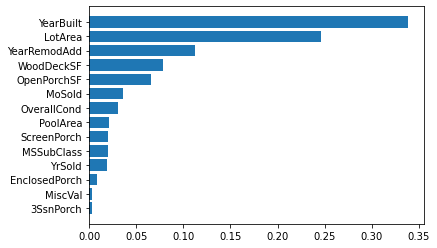

In [32]:
#newmodel3.feature_importances_
from matplotlib import pyplot as plt
f_i = list(zip(house_features,newmodel3.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [33]:
test_preds3 = newmodel3.predict(X_test3)

In [34]:
#output = pd.DataFrame({'Id': sample_submission.Id,
#'SalePrice': test_preds3})
#output.to_csv('submission4.csv', index=False)

In [35]:
copy = house_data.copy()

In [64]:
copyfeat = ['YrSold', 'YearBuilt','YearRemodAdd','MSSubClass','LotArea','OverallCond','WoodDeckSF','OpenPorchSF','ScreenPorch','PoolArea','MoSold']
X2 = copy[copyfeat]
y2 = copy.SalePrice
train_X, val_X, train_y, val_y = train_test_split(X2, y2, random_state = 0)

house_model4 = RandomForestRegressor(random_state=1, n_estimators = 60, max_features = 9, min_samples_leaf = 11, max_leaf_nodes = 60)
house_model4.fit(train_X, train_y)
val_predictions4 = house_model4.predict(val_X)

mae4 = mean_absolute_error(val_y, val_predictions4)
mae4



32615.307221195377

In [65]:
newmodel4 = RandomForestRegressor(random_state=1, n_estimators = 60, max_features = 9)
newmodel4.fit(X2,y2)
X_test4 = house_data_test[copyfeat]
X_test4
test_preds4 = newmodel4.predict(X_test4)

In [66]:
output = pd.DataFrame({'Id': sample_submission.Id,
'SalePrice': test_preds4})
output.to_csv('submission7.csv', index=False)


In [ ]:
32669, 32620, 32615